#Regression

In [17]:
#Read the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_excel(r'/content/Final_Dataset.xlsx')
print(df)


      User_ID  Age  Gender  Total_App_Usage_Hours  Daily_Screen_Time_Hours  \
0           1   56    Male                   2.61                     7.15   
1           2   46    Male                   2.13                    13.79   
2           3   32  Female                   7.28                     4.50   
3           4   25  Female                   1.20                     6.29   
4           5   38    Male                   6.31                    12.59   
...       ...  ...     ...                    ...                      ...   
1081     1052   46  Female                   5.11                     3.79   
1082     1053   29    Male                  10.67                    12.47   
1083     1054   53  Female                   3.87                     2.55   
1084     1055   42    Male                   8.72                     9.31   
1085     1056   26  Female                   9.19                     5.82   

      Number_of_Apps_Used  Social_Media_Usage_Hours  \
0       

In [18]:
#Step 2: Data Cleaning (Replace all the missing values in the numeric coloumns with the mean of the coloumn it belongs to.
#Replace all the missing values in the non numeric coloumns with the mode of the coloumn it belongs to.)

# Convert all columns to numeric where possible (non-convertible values become NaN)
df = df.apply(pd.to_numeric, errors='ignore')

# For each column, if it's numeric, replace NaNs with the column mean
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    mean_value = pd.to_numeric(df[col], errors='coerce').mean()
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(mean_value)

# Fill missing values in categorical columns with the most frequent value (mode)
for col in df.select_dtypes(include=['object']).columns:
    mode_value = df[col].mode(dropna=True)
    if not mode_value.empty:
        df[col] = df[col].fillna(mode_value[0])

# Display the cleaned DataFrame
print(df)

      User_ID  Age  Gender  Total_App_Usage_Hours  Daily_Screen_Time_Hours  \
0           1   56    Male                   2.61                     7.15   
1           2   46    Male                   2.13                    13.79   
2           3   32  Female                   7.28                     4.50   
3           4   25  Female                   1.20                     6.29   
4           5   38    Male                   6.31                    12.59   
...       ...  ...     ...                    ...                      ...   
1081     1052   46  Female                   5.11                     3.79   
1082     1053   29    Male                  10.67                    12.47   
1083     1054   53  Female                   3.87                     2.55   
1084     1055   42    Male                   8.72                     9.31   
1085     1056   26  Female                   9.19                     5.82   

      Number_of_Apps_Used  Social_Media_Usage_Hours  \
0       

<ipython-input-18-954cca4a79de>:5: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


In [19]:
#Step 2: Data Cleaning (Remove duplicate rows)
# Remove duplicate rows
df = df.drop_duplicates()

# Optionally reset the index
df = df.reset_index(drop=True)

# Display the cleaned DataFrame
print(df)

      User_ID  Age  Gender  Total_App_Usage_Hours  Daily_Screen_Time_Hours  \
0           1   56    Male                   2.61                     7.15   
1           2   46    Male                   2.13                    13.79   
2           3   32  Female                   7.28                     4.50   
3           4   25  Female                   1.20                     6.29   
4           5   38    Male                   6.31                    12.59   
...       ...  ...     ...                    ...                      ...   
1051     1052   46  Female                   5.11                     3.79   
1052     1053   29    Male                  10.67                    12.47   
1053     1054   53  Female                   3.87                     2.55   
1054     1055   42    Male                   8.72                     9.31   
1055     1056   26  Female                   9.19                     5.82   

      Number_of_Apps_Used  Social_Media_Usage_Hours  \
0       

In [20]:
#Shows the coloumns' names(used while working on the code,uneccesary for the project)

print(df.columns.tolist())

['User_ID', 'Age', 'Gender', 'Total_App_Usage_Hours', 'Daily_Screen_Time_Hours', 'Number_of_Apps_Used', 'Social_Media_Usage_Hours', 'Productivity_App_Usage_Hours', 'Gaming_App_Usage_Hours', 'Location', 'Attention_Span_Min', 'Relationship_Status', 'Sleep_Quality', 'Physical_Health_Score', 'Online_Shopping_Frequency']


In [21]:
# ============================
# REGRESSION MODELS SECTION
# ============================

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split




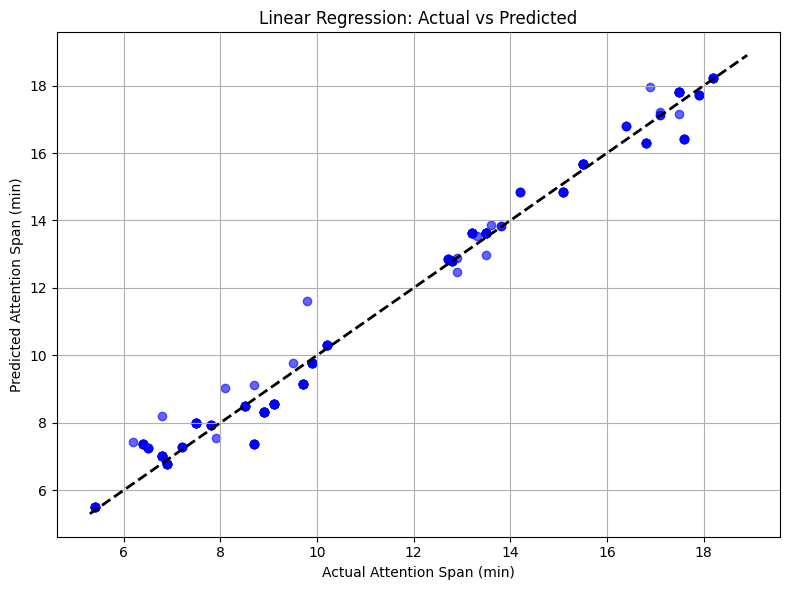

R² Score: 0.9833
RMSE: 0.5113


In [22]:
######################################
#LINEAR REGRESSION
######################################

# Define features and target
features = ['Daily_Screen_Time_Hours', 'Social_Media_Usage_Hours',
            'Gaming_App_Usage_Hours', 'Age', 'Sleep_Quality']
target = 'Attention_Span_Min'

X = df[features]
y = df[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate model
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Plot actual vs predicted values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel("Actual Attention Span (min)")
plt.ylabel("Predicted Attention Span (min)")
plt.title("Linear Regression: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

# Print metrics
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")



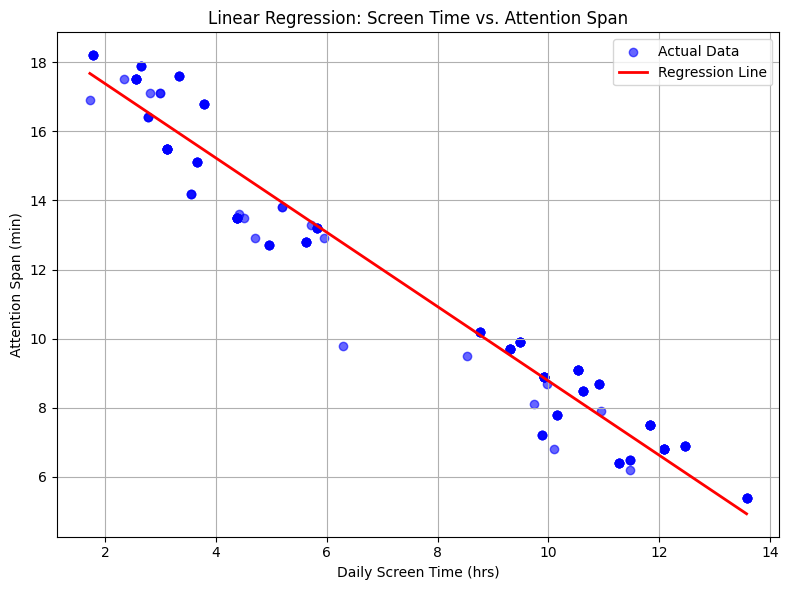

Linear Regression Equation: y = -1.0741x + 19.5210
R² Score: 0.9521
RMSE: 0.8661


In [23]:
######################################
#LINEAR REGRESSION
######################################

# STEP 1: Select feature and target
X = df[['Daily_Screen_Time_Hours']]  # Feature
y = df['Attention_Span_Min']         # Target

# STEP 2: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 3: Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# STEP 4: Predict on test set
y_pred = model.predict(X_test)

# STEP 5: Evaluate the model
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# STEP 6: Get the regression coefficients
slope = model.coef_[0]
intercept = model.intercept_

# STEP 7: Plot the regression line
# Sort test data for line plotting
sorted_idx = X_test.squeeze().argsort()
X_sorted = X_test.values[sorted_idx]
y_sorted = y_pred[sorted_idx]

plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.6, label='Actual Data')
plt.plot(X_sorted, y_sorted, color='red', linewidth=2, label='Regression Line')
plt.xlabel("Daily Screen Time (hrs)")
plt.ylabel("Attention Span (min)")
plt.title("Linear Regression: Screen Time vs. Attention Span")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# STEP 8: Print results
print(f"Linear Regression Equation: y = {slope:.4f}x + {intercept:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

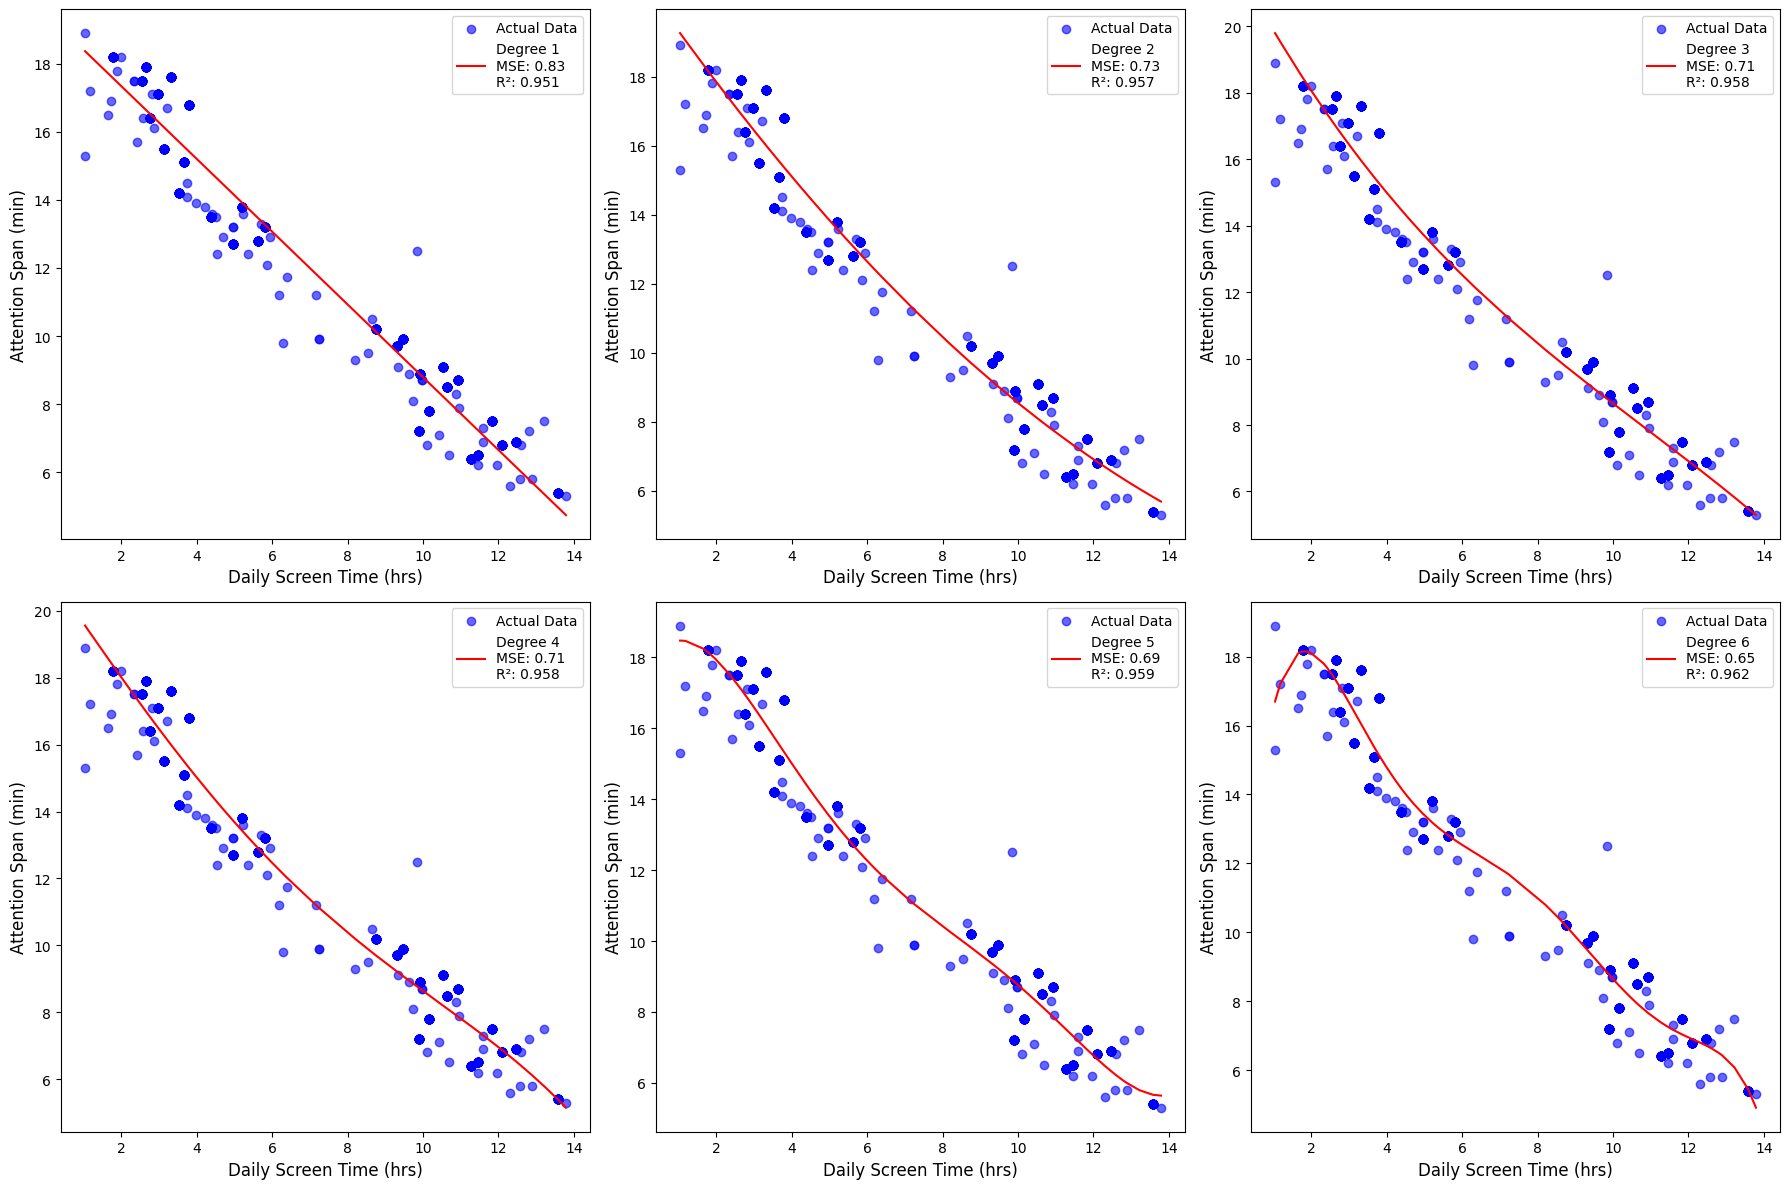

In [27]:
# Step 1: Extract feature and target from your dataset
x_data = df[['Daily_Screen_Time_Hours']].values       # Feature: Screen Time
y_data = df[['Attention_Span_Min']].values            # Target: Attention Span

# Step 2: Define polynomial degrees to compare
degrees = [1, 2, 3, 4, 5, 6]

# Step 3: Create subplots (2 rows × 3 columns)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
axes = axes.flatten()

# Step 4: Loop through each degree and fit polynomial regression
for i, degree in enumerate(degrees):
    # Create polynomial features up to the given degree
    poly = PolynomialFeatures(degree=degree)
    x_poly = poly.fit_transform(x_data)

    # Fit the regression model
    model = LinearRegression()
    model.fit(x_poly, y_data)

    # Predict y values
    y_pred = model.predict(x_poly)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_data, y_pred)
    r2 = r2_score(y_data, y_pred)

    # Sort values for smooth curve
    sorted_pairs = sorted(zip(x_data, y_pred))
    x_sorted, y_sorted = zip(*sorted_pairs)

    # Plot
    axes[i].scatter(x_data, y_data, color='blue', label='Actual Data', alpha=0.6)
    axes[i].plot(x_sorted, y_sorted, color='red',
                 label=f'Degree {degree}\nMSE: {mse:.2f}\nR²: {r2:.3f}')
    axes[i].set_xlabel("Daily Screen Time (hrs)", fontsize=12)
    axes[i].set_ylabel("Attention Span (min)", fontsize=12)
    axes[i].legend(fontsize=10)
    axes[i].tick_params(axis='both', which='major', labelsize=10)

# Final layout adjustment and display
plt.tight_layout()
plt.show()